In [80]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import glob
import os.path

import fuzzywuzzy
from fuzzywuzzy import fuzz

import openpyxl
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import string

from openpyxl import Workbook
from openpyxl.styles import Color, PatternFill, Font, Border
from openpyxl.styles.differential import DifferentialStyle
from openpyxl.formatting.rule import ColorScaleRule, CellIsRule, FormulaRule

import xlsxwriter
import pandas as pd
import yfinance as yf
import time
import datetime
from datetime import date, datetime, time, timedelta

In [2]:
path1=r"C:\Users\cwesterb\spinoff\historical_spinoffs\Spinoffs-com.csv"
path2=r"C:\Users\cwesterb\spinoff\historical_spinoffs\stockanalysis-com.csv"
DF1=pd.read_csv(path1)
DF2=pd.read_csv(path2)

In [3]:
DF3 = pd.concat([DF1,DF2])
DF3.head()

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE,Unnamed: 5
0,Apartment & Investment Management Company (AIMCO),AIV,Apartment Income REIT Corp,AIRC,12/15/2020,NaN
1,SYNNEX Corporation,SNX,Concentrix Corporation,CNXC,12/1/2020,NaN
2,Fortive Corporation,FTV,Vontier Corporation,VNT,10/9/2020,NaN
3,Bluegreen Vacation Holding Corporation (FKA: B...,BBX,BBX Capital,BBXIB,9/30/2020,NaN
4,Siemens AG,SIEGY,Siemens Energy AG,SMNEY,9/28/2020,NaN


In [4]:
DF3.drop('Unnamed: 5', inplace=True, axis=1)
DF3.head()

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE
0,Apartment & Investment Management Company (AIMCO),AIV,Apartment Income REIT Corp,AIRC,12/15/2020
1,SYNNEX Corporation,SNX,Concentrix Corporation,CNXC,12/1/2020
2,Fortive Corporation,FTV,Vontier Corporation,VNT,10/9/2020
3,Bluegreen Vacation Holding Corporation (FKA: B...,BBX,BBX Capital,BBXIB,9/30/2020
4,Siemens AG,SIEGY,Siemens Energy AG,SMNEY,9/28/2020


In [5]:
DF3['SPINOFF DATE']=pd.to_datetime(DF3['SPINOFF DATE'].values)

DF3.head()

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE
0,Apartment & Investment Management Company (AIMCO),AIV,Apartment Income REIT Corp,AIRC,2020-12-15
1,SYNNEX Corporation,SNX,Concentrix Corporation,CNXC,2020-12-01
2,Fortive Corporation,FTV,Vontier Corporation,VNT,2020-10-09
3,Bluegreen Vacation Holding Corporation (FKA: B...,BBX,BBX Capital,BBXIB,2020-09-30
4,Siemens AG,SIEGY,Siemens Energy AG,SMNEY,2020-09-28


In [6]:
DF3=DF3.sort_values(by=['SPINOFF DATE'],ascending=False)

DF3.head(n=20)

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE
0,ENOVIS CORP,ENOV,ESAB CORP,ESAB,2022-04-05
1,BECTON DICKINSON & CO,BDX,EMBECTA CORP,EMBC,2022-04-01
2,BROOKFIELD BUSINESS PARTNERS LP,BBU,BROOKFIELD BUSINESS CORP,BBUC,2022-03-15
3,POST HOLDINGS INC,POST,BELLRING BRANDS INC,BRBR,2022-03-11
4,ZIMMER BIOMET HOLDINGS INC,ZBH,ZIMVIE INC,ZIMV,2022-03-01
5,CNH INDUSTRIAL NV,CNHI,IVECO GROUP,IVCGF,2022-01-03
6,Vector Group Ltd.,VGR,"Douglas Elliman, Inc.",DOUG,2021-12-30
8,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPP,2021-12-06
7,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPPP,2021-12-06
9,"Diana Shipping, Inc.",DSX,"Oceanpal, Inc.",OP,2021-11-30


In [7]:
DF4=DF3.drop_duplicates(subset=['SPINOFF TICKER'], keep='first')
DF4.head(n=20)

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE
0,ENOVIS CORP,ENOV,ESAB CORP,ESAB,2022-04-05
1,BECTON DICKINSON & CO,BDX,EMBECTA CORP,EMBC,2022-04-01
2,BROOKFIELD BUSINESS PARTNERS LP,BBU,BROOKFIELD BUSINESS CORP,BBUC,2022-03-15
3,POST HOLDINGS INC,POST,BELLRING BRANDS INC,BRBR,2022-03-11
4,ZIMMER BIOMET HOLDINGS INC,ZBH,ZIMVIE INC,ZIMV,2022-03-01
5,CNH INDUSTRIAL NV,CNHI,IVECO GROUP,IVCGF,2022-01-03
6,Vector Group Ltd.,VGR,"Douglas Elliman, Inc.",DOUG,2021-12-30
8,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPP,2021-12-06
7,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPPP,2021-12-06
9,"Diana Shipping, Inc.",DSX,"Oceanpal, Inc.",OP,2021-11-30


In [8]:
companies=DF4['SPINOFF TICKER'].values
tickers=[]
for tick in companies:
    if ( (tick not in tickers) and (not pd.isnull(tick))):
        tickers.append(tick)
portfolio_tickers=sorted(tickers)
ticker_columns = portfolio_tickers

print(ticker_columns)

['AA', 'AABA', 'AAMC', 'AAN', 'ABBV', 'AC', 'ACA', 'ACCO', 'ACDO', 'ACI', 'ACMSY', 'ADAPT.ST', 'ADNT', 'ADT', 'ADT1', 'AFI', 'AGE', 'AGR.B', 'AGR1', 'AGX1', 'AHP', 'AINC', 'AIRC', 'AKCA', 'ALC', 'ALC1', 'ALEX', 'ALLE', 'ALNT', 'AMCX', 'AMP', 'AMTB', 'ANCJQ', 'AOL', 'AOUT', 'APEMY', 'APVO', 'APW', 'APY', 'AQB', 'ARJ', 'ARLO', 'ARNC', 'ARP', 'ARPJQ', 'ASAI', 'ASCMA', 'ASIX', 'ASPS', 'ASTI1', 'ATLS', 'AUD', 'AV1', 'AVNS', 'AVNW', 'AXDDF', 'AXLL', 'BAGR', 'BBU', 'BBUC', 'BBXIA', 'BBXIB', 'BEPC', 'BHF', 'BHR', 'BHS', 'BIPC', 'BIVV', 'BKI', 'BKR', 'BLD', 'BNED', 'BPMP', 'BPY', 'BR', 'BRBR', 'BRLCQ', 'BRSP', 'BSTG', 'BW', 'BWC', 'BWXT', 'BXLT', 'BXRX', 'CABO', 'CACQ', 'CARR', 'CARS', 'CBSO', 'CBZ1', 'CC', 'CCP', 'CCSI', 'CDK', 'CDXS', 'CEIX', 'CEVA', 'CFL', 'CFN', 'CGNT', 'CHAP1', 'CHRYY', 'CHUBA', 'CHUBB', 'CHUBK', 'CHX', 'CLEGF', 'CLW', 'CNDT', 'CNSI', 'CNXC', 'COV', 'COVS', 'CPEX1', 'CPGX', 'CPLG', 'CPNVF', 'CRC', 'CRCQQ', 'CRNC', 'CSAL', 'CSRA', 'CST', 'CSWI', 'CTGO', 'CTRE', 'CTVA', 'CVC

In [9]:
stocks = yf.download(tickers = ticker_columns, start="1998-01-30", interval='1d', threads= False)

[*********************100%***********************]  533 of 533 completed

173 Failed downloads:
- PBKEF: No data found, symbol may be delisted
- VSM: No data found, symbol may be delisted
- CHAP1: No data found, symbol may be delisted
- TWHR: No data found, symbol may be delisted
- ATLS: No data found, symbol may be delisted
- MMI1: No data found, symbol may be delisted
- LMI: No data found, symbol may be delisted
- BPY: No data found, symbol may be delisted
- CFN: No data found for this date range, symbol may be delisted
- KLX: No data found for this date range, symbol may be delisted
- FSL.B: No data found for this date range, symbol may be delisted
- QHCCQ: No data found, symbol may be delisted
- WWAV.B: No data found, symbol may be delisted
- AABA: No data found, symbol may be delisted
- SNVT: No data found for this date range, symbol may be delisted
- DEMBF: No data found, symbol may be delisted
- SZMK: No data found for this date range, symbol may be delisted
- NSAM: No data foun

In [10]:
stock_data=stocks['Adj Close']
#stock_data=stock_data.dropna()
stock_data.head(n=100)

,AA,AABA,AAMC,AAN,ABBV,AC,ACA,ACCO,ACDO,ACI,...,XP,XPL,XYL,YUMC,ZBH,ZDGE,ZEP,ZIMV,ZIOP,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,32.965057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-02,33.693409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-03,33.261799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-04,33.017818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-05,32.773853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-17,28.148104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-18,27.794559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-19,28.039326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
SPY= yf.download(tickers = ["SPY"], start="1998-01-30", interval='1d', threads= False)

[*********************100%***********************]  1 of 1 completed


In [12]:
SPY=pd.DataFrame(SPY['Adj Close'])
SPY=SPY.dropna()
SPY.head()

,Adj Close
Date,
1998-01-30,63.747440
1998-02-02,64.801102
1998-02-03,65.287445
1998-02-04,65.206398
1998-02-05,65.165833


In [20]:
ticker="REZI"

temp=stock_data[[ticker]]
temp=temp.dropna()
print(len(temp))
price=temp[ticker].values
six_mon=(price[127]-price[14])/price[14]
print(six_mon)
one_year=(price[254]-price[14])/price[14]
print(one_year)
year_and_half=(price[381]-price[14])/price[14]
print(year_and_half)
#two_year=
temp.head()

872
0.10941956170181953
-0.5304472088194637
-0.7764034392525807


,REZI
Date,
2018-10-29,25.820000
2018-10-30,21.059999
2018-10-31,21.049999
2018-11-01,22.000000
2018-11-02,23.780001


<IPython.core.display.Javascript object>


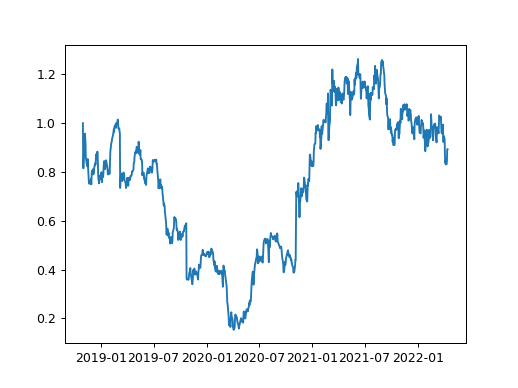

In [22]:
plt.figure()
plt.plot(temp/price[0])


In [47]:
half_year=[]
year_one=[]
one_and_half_year=[]
two_year=[]
intitial_price=[]
spy6=[]
spy12=[]
spy18=[]
spy24=[]

companies=stock_data.columns

for ticker in companies:
    temp=stock_data[[ticker]]
    temp=temp.dropna()
    #if we don't have any data
    if(len(temp)==0):
        half_year.append(np.nan)
        year_one.append(np.nan)
        one_and_half_year.append(np.nan)
        two_year.append(np.nan)
        intitial_price.append(np.nan)
        spy6.append(np.nan)
        spy12.append(np.nan)
        spy18.append(np.nan)
        spy24.append(np.nan)
        
    else:       
        temp2=DF4[DF4['SPINOFF TICKER']==ticker]
        start=temp2['SPINOFF DATE'].values
        start=start[0]
        temp=temp[temp.index>start]
        price=temp[ticker].values
        base=price[0]
        spy_temp=SPY[SPY.index>start]
        spy_temp=spy_temp["Adj Close"].values
        spy_base=spy_temp[0]
        if(len(price)>128):
            six_mon=(price[127]-base)/base
            spy6.append((spy_temp[127]-spy_base)/spy_base)
        else:
            six_mon=np.nan
            spy6.append(np.nan)
        if(len(price)>254):
            one_year=(price[254]-base)/base
            spy12.append((spy_temp[245]-spy_base)/spy_base)
        else:
            one_year=np.nan
            spy12.append(np.nan)
        if(len(price)>381):
            year_and_half=(price[381]-base)/base
            spy18.append((spy_temp[381]-spy_base)/spy_base)
        else:
            year_and_half=np.nan
            spy18.append(np.nan)
        if(len(price)>508):
            year_two=(price[508]-base)/base
            spy24.append((spy_temp[508]-spy_base)/spy_base)
        else:
            year_two=np.nan
            spy24.append(np.nan)
        half_year.append(six_mon)
        year_one.append(one_year)
        one_and_half_year.append(year_and_half)
        two_year.append(year_two)
        intitial_price.append(base)
        

performanceDF=pd.DataFrame(companies,columns=['Ticker'])
performanceDF['Spinoff Price']=intitial_price
performanceDF['6 Month Gain']=half_year
performanceDF['12 Month Gain']=year_one
performanceDF['18 Month Gain']=one_and_half_year
performanceDF['24 Month Gain']=two_year
performanceDF['SPY 6 Month Gain']=spy6
performanceDF['SPY 12 Month Gain']=spy12
performanceDF['SPY 18 Month Gain']=spy18
performanceDF['SPY 24 Month Gain']=spy24
performanceDF.head()

,Ticker,Spinoff Price,6 Month Gain,12 Month Gain,18 Month Gain,24 Month Gain,SPY 6 Month Gain,SPY 12 Month Gain,SPY 18 Month Gain,SPY 24 Month Gain
0,AA,22.834860,0.353994,1.064164,1.347883,0.587953,0.154388,0.247981,0.335273,0.389343
1,AABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAMC,15.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAN,17.892502,1.000332,0.320485,NaN,NaN,0.159732,0.292719,NaN,NaN
4,ABBV,23.586914,0.280766,0.507513,0.693978,1.027472,0.136009,0.277814,0.387174,0.457806


In [48]:
DF5=DF4.merge(performanceDF, left_on='SPINOFF TICKER', right_on='Ticker')

In [49]:
print(spy_base)

133.43983459472656


In [73]:
DF5.head(n=25)

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE,Ticker,Spinoff Price,6 Month Gain,12 Month Gain,18 Month Gain,24 Month Gain,SPY 6 Month Gain,SPY 12 Month Gain,SPY 18 Month Gain,SPY 24 Month Gain
0,ENOVIS CORP,ENOV,ESAB CORP,ESAB,2022-04-05,ESAB,45.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BECTON DICKINSON & CO,BDX,EMBECTA CORP,EMBC,2022-04-01,EMBC,31.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BROOKFIELD BUSINESS PARTNERS LP,BBU,BROOKFIELD BUSINESS CORP,BBUC,2022-03-15,BBUC,32.950001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POST HOLDINGS INC,POST,BELLRING BRANDS INC,BRBR,2022-03-11,BRBR,25.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ZIMMER BIOMET HOLDINGS INC,ZBH,ZIMVIE INC,ZIMV,2022-03-01,ZIMV,24.309999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CNH INDUSTRIAL NV,CNHI,IVECO GROUP,IVCGF,2022-01-03,IVCGF,12.253000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Vector Group Ltd.,VGR,"Douglas Elliman, Inc.",DOUG,2021-12-30,DOUG,11.425422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPP,2021-12-06,IMPP,4.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Stealthgas, Inc.",GASS,Imperial Petroleum Inc/Marshall Islands,IMPPP,2021-12-06,IMPPP,18.335241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Diana Shipping, Inc.",DSX,"Oceanpal, Inc.",OP,2021-11-30,OP,6.124498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
DF6=DF5.dropna(subset=['24 Month Gain'])
DF6.head()

,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE,Ticker,Spinoff Price,6 Month Gain,12 Month Gain,18 Month Gain,24 Month Gain,SPY 6 Month Gain,SPY 12 Month Gain,SPY 18 Month Gain,SPY 24 Month Gain
50,Raytheon Technologies Corp.,RTX,Otis Worldwide Corp.,OTIS,2020-04-03,OTIS,44.821907,0.399113,0.560242,0.850941,0.703854,0.275204,0.519030,0.690581,0.709797
51,Raytheon Technologies Corp.,RTX,Carrier Global Corp.,CARR,2020-04-03,CARR,15.139300,1.048313,1.794369,2.384297,1.803300,0.275204,0.519030,0.690581,0.709797
52,"Howmet Aerospace, Inc.",HWM,Arconic Corp.,ARNC,2020-04-01,ARNC,6.210000,2.143317,3.199678,3.953301,3.051530,0.336820,0.563493,0.766033,0.834440
53,Brookfield Infrastructure Partners LP,BIP,Brookfield Infrastructure Corp.,BIPC,2020-04-01,BIPC,34.208481,0.535953,1.081581,0.685695,1.220794,0.336820,0.563493,0.766033,0.834440
55,Trane Technologies PLC,TT,"Ingersoll Rand, Inc.",IR,2020-03-02,IR,31.674938,0.142271,0.561199,0.670031,0.450358,0.186498,0.313142,0.547321,0.431107


In [75]:
DF6['2 Year SPY Relative perfromance']=DF6["24 Month Gain"].values-DF6["SPY 24 Month Gain"].values

C:\Users\cwesterb\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
DF6['1.5 Year SPY Relative perfromance']=DF6["18 Month Gain"].values-DF6["SPY 18 Month Gain"].values
DF6.head()

C:\Users\cwesterb\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PARENT NAME,PARENT TICKER,SPINOFF NAME,SPINOFF TICKER,SPINOFF DATE,Ticker,Spinoff Price,6 Month Gain,12 Month Gain,18 Month Gain,24 Month Gain,SPY 6 Month Gain,SPY 12 Month Gain,SPY 18 Month Gain,SPY 24 Month Gain,2 Year SPY Relative perfromance,1.5 Year SPY Relative perfromance
50,Raytheon Technologies Corp.,RTX,Otis Worldwide Corp.,OTIS,2020-04-03,OTIS,44.821907,0.399113,0.560242,0.850941,0.703854,0.275204,0.519030,0.690581,0.709797,-0.005943,0.160361
51,Raytheon Technologies Corp.,RTX,Carrier Global Corp.,CARR,2020-04-03,CARR,15.139300,1.048313,1.794369,2.384297,1.803300,0.275204,0.519030,0.690581,0.709797,1.093503,1.693717
52,"Howmet Aerospace, Inc.",HWM,Arconic Corp.,ARNC,2020-04-01,ARNC,6.210000,2.143317,3.199678,3.953301,3.051530,0.336820,0.563493,0.766033,0.834440,2.217090,3.187268
53,Brookfield Infrastructure Partners LP,BIP,Brookfield Infrastructure Corp.,BIPC,2020-04-01,BIPC,34.208481,0.535953,1.081581,0.685695,1.220794,0.336820,0.563493,0.766033,0.834440,0.386354,-0.080339
55,Trane Technologies PLC,TT,"Ingersoll Rand, Inc.",IR,2020-03-02,IR,31.674938,0.142271,0.561199,0.670031,0.450358,0.186498,0.313142,0.547321,0.431107,0.019251,0.122710


<IPython.core.display.Javascript object>


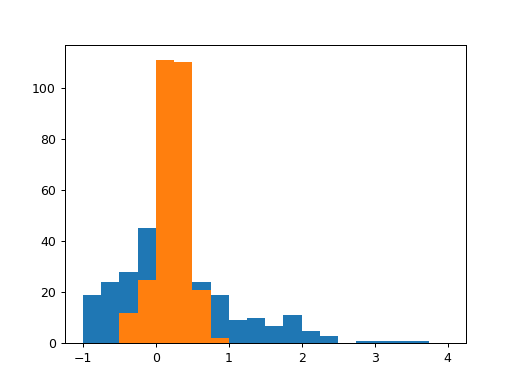

(array([  0.,   0.,  12.,  25., 111., 110.,  21.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
         3.5 ,  3.75,  4.  ]),
 <BarContainer object of 20 artists>)

In [229]:
plt.figure()
plt.hist(DF6["24 Month Gain"].values, bins=20, range=[-1,4])
plt.hist(DF6["SPY 24 Month Gain"].values, bins=20, range=[-1,4])




In [60]:
print(np.median(DF6["2 Year SPY Relative perfromance"].values))

-0.07033442544886398


2005-01-01 00:00:00
Meadin: -0.04211693317817972
Mean: 0.135523659909551
Companies 14


<IPython.core.display.Javascript object>


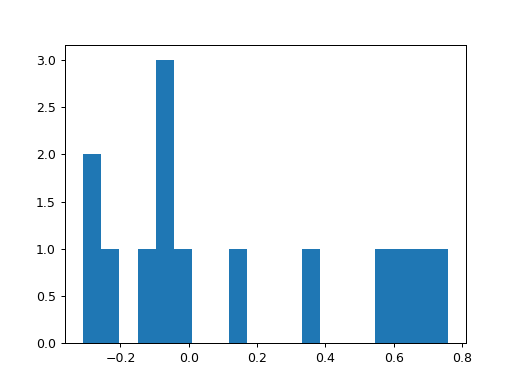

(array([2., 1., 0., 1., 3., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 1.]),
 array([-0.30987477, -0.25648752, -0.20310026, -0.14971301, -0.09632576,
        -0.0429385 ,  0.01044875,  0.063836  ,  0.11722326,  0.17061051,
         0.22399776,  0.27738502,  0.33077227,  0.38415952,  0.43754678,
         0.49093403,  0.54432128,  0.59770854,  0.65109579,  0.70448305,
         0.7578703 ]),
 <BarContainer object of 20 artists>)

In [233]:
date=pd.to_datetime('1-1-2005')
date_end=date+timedelta(weeks=104)
print(date)
temp=DF6
temp=temp[(temp['SPINOFF DATE']>date)&(temp['SPINOFF DATE']<date_end)]
data=temp["1.5 Year SPY Relative perfromance"].values
#data=temp["24 Month Gain"].values
print("Meadin:",np.median(data))
print("Mean:",np.mean(data))
print("Companies",len(temp))
plt.figure()
plt.hist(data, bins=20)

In [179]:
dates=['1-1-2000','1-1-2001','1-1-2002','1-1-2003','1-1-2004','1-1-2005','1-1-2006','1-1-2007','1-1-2008','1-1-2009','1-1-2010','1-1-2011','1-1-2012','1-1-2013','1-1-2014','1-1-2015','1-1-2016','1-1-2017','1-1-2018','1-1-2019','1-1-2020']
column_names=['6 Month Gain',
       '12 Month Gain', '18 Month Gain', '24 Month Gain', 'SPY 6 Month Gain',
       'SPY 12 Month Gain', 'SPY 18 Month Gain', 'SPY 24 Month Gain',
       '2 Year SPY Relative perfromance', '1.5 Year SPY Relative perfromance']
temp_columns=["Date"]+column_names
meanDF=pd.DataFrame(columns=temp_columns)
medianDF=pd.DataFrame(columns=temp_columns)


for date in dates:
    date=pd.to_datetime(date)
    date_end=date+timedelta(weeks=52)    
    temp=DF6
    temp=temp[(temp['SPINOFF DATE']>date)&(temp['SPINOFF DATE']<date_end)]
    mean=[]
    mean.append(date)
    median=[]
    median.append(date)
    for name in column_names:
        mean.append(np.mean(temp[name].values))
        median.append(np.median(temp[name].values))
    meanDF.loc[len(meanDF.index)] = mean
    medianDF.loc[len(medianDF.index)] = median


In [181]:
medianDF.head(n=25)

,Date,6 Month Gain,12 Month Gain,18 Month Gain,24 Month Gain,SPY 6 Month Gain,SPY 12 Month Gain,SPY 18 Month Gain,SPY 24 Month Gain,2 Year SPY Relative perfromance,1.5 Year SPY Relative perfromance
0,2000-01-01,0.522911,0.620806,1.082820,1.382010,-0.071431,-0.160210,-0.218107,-0.356937,1.695619,1.309630
1,2001-01-01,0.214197,0.562904,0.528199,0.855338,-0.061353,-0.170256,-0.256642,-0.153787,1.028775,0.809385
2,2002-01-01,0.028398,0.736957,0.836957,0.739130,0.029617,0.146866,0.232424,0.325401,0.413730,0.563850
3,2003-01-01,0.165308,1.190022,1.077769,1.330154,0.105239,0.236160,0.240990,0.333047,0.943317,0.745486
4,2004-01-01,0.207256,0.237663,0.222522,0.213354,0.036817,0.071209,0.128254,0.168303,0.032139,0.080092
5,2005-01-01,0.075676,0.124337,0.407403,0.280211,0.035427,0.052228,0.207973,0.222918,0.059100,0.262405
6,2006-01-01,0.121898,0.013569,-0.088990,-0.202847,0.088900,0.148734,0.035329,-0.155836,0.012658,-0.114886
7,2007-01-01,-0.071444,-0.379310,-0.547000,-0.558061,-0.039519,-0.119737,-0.365339,-0.393635,-0.164427,-0.181661
8,2008-01-01,-0.220172,-0.154487,0.085039,0.225978,-0.252995,-0.194291,-0.100079,-0.058941,0.316385,0.239130
9,2009-01-01,0.275613,0.161959,0.201801,0.098451,0.104021,0.163272,0.307358,0.336670,-0.214221,-0.092993


In [175]:
column_names=['6 Month Gain',
       '12 Month Gain', '18 Month Gain', '24 Month Gain', 'SPY 6 Month Gain',
       'SPY 12 Month Gain', 'SPY 18 Month Gain', 'SPY 24 Month Gain',
       '2 Year SPY Relative perfromance', '1.5 Year SPY Relative perfromance']
print(['a1']+column_names)

['a1', '6 Month Gain', '12 Month Gain', '18 Month Gain', '24 Month Gain', 'SPY 6 Month Gain', 'SPY 12 Month Gain', 'SPY 18 Month Gain', 'SPY 24 Month Gain', '2 Year SPY Relative perfromance', '1.5 Year SPY Relative perfromance']


In [182]:
medianDF.to_csv(r"C:\Users\cwesterb\spinoff\historical_spinoffs\medain_summary.csv")
meanDF.to_csv(r"C:\Users\cwesterb\spinoff\historical_spinoffs\mean_summary.csv")

In [183]:
CSD= yf.download(tickers = ["CSD"], interval='1d', threads= False)
CSD=pd.DataFrame(CSD['Adj Close'])
CSD=CSD.dropna()
CSD.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2006-12-15,21.064049
2006-12-18,20.796574
2006-12-19,20.880157
2006-12-20,20.888515
2006-12-21,20.813286


In [184]:
CSD.to_csv(r"C:\Users\cwesterb\spinoff\historical_spinoffs\CSD_index.csv")

In [185]:
SPY.to_csv(r"C:\Users\cwesterb\spinoff\historical_spinoffs\SPY_index.csv")

<IPython.core.display.Javascript object>


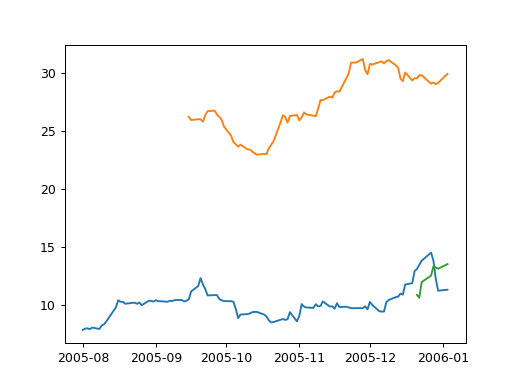

,OFLX,AMP,LYV,TCMIQ
Date,,,,
2006-01-03,11.292459,29.897305,13.5,NaN


In [217]:
Current_date='1-3-2006'
tickers=["OFLX","AMP","LYV"]
plt.figure()
OFLX=pd.DataFrame(stock_data[tickers])
temp=OFLX[OFLX.index <=pd.to_datetime(Current_date)]
plt.plot(temp)
temp=OFLX[OFLX.index == pd.to_datetime(Current_date)]
temp.head()

<IPython.core.display.Javascript object>


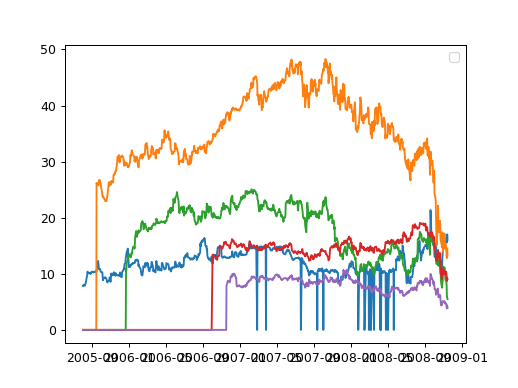

No handles with labels found to put in legend.


In [222]:
start_date=pd.to_datetime('8-1-2005')
end_date=pd.to_datetime('11-16-2008')
tickers=["OFLX","AMP","LYV","WU","SBH"]
selectedDF=pd.DataFrame(stock_data[tickers])
selectedDF=selectedDF[selectedDF.index >=start_date]
selectedDF=selectedDF[selectedDF.index <=end_date]
selectedDF=selectedDF.dropna(how='all')
selectedDF=selectedDF.fillna(0)
plt.figure()
plt.plot(selectedDF)
plt.legend()

<IPython.core.display.Javascript object>


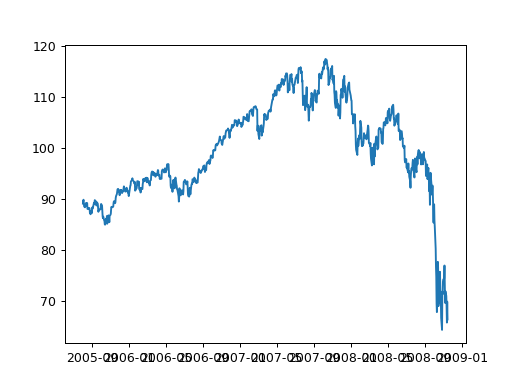

In [223]:
tempSPY=SPY
tempSPY=tempSPY[tempSPY.index >=start_date]
tempSPY=tempSPY[tempSPY.index <=end_date]
tempSPY=tempSPY.dropna()
plt.figure()
plt.plot(tempSPY)

<IPython.core.display.Javascript object>


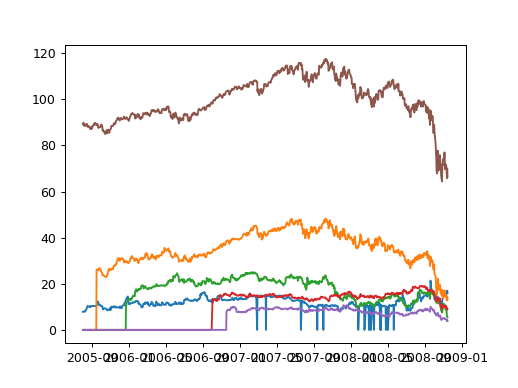

In [226]:
selectedDF=selectedDF.merge(tempSPY, left_index=True, right_index=True)
plt.figure()
plt.plot(selectedDF)

In [227]:
selectedDF.to_csv(r"C:\Users\cwesterb\spinoff\historical_spinoffs\spinoffpicks2005-2006.csv")